In [53]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from scipy.stats import norm
import numpy as np

In [2]:
#style.use('ggplot')

#starting with past 2 years data
start = dt.datetime(2018,1,1)
end = dt.datetime(2020,1,22)

#path for XLK ETF excel file. Read excel file
file = r'C:\Users\piyus\Desktop\List of XLK Etf.xlsx'
tickerdf = pd.read_excel(file)

tickers=tickerdf['Ticker']
tickerdf.set_index('Ticker',inplace=True)

df =  web.DataReader(tickers,'yahoo',start,end)
    
closeDF = df['Close'].iloc[:, :]
closeDF.head()


Symbols,AAPL,MSFT,V,MA,INTC,CSCO,ADBE,CRM,NVDA,PYPL,...,IT,CTXS,STX,QRVO,LDOS,ZBRA,ANET,JKHY,WU,DXC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,172.259995,85.949997,114.510002,151.910004,46.849998,38.860001,177.699997,104.410004,199.350006,73.839996,...,124.849998,88.690002,42.930000,68.879997,64.000000,103.709999,231.029999,116.190002,19.080000,82.223183
2018-01-03,172.229996,86.349998,115.650002,153.820007,45.259998,39.169998,181.039993,105.290001,212.470001,76.750000,...,125.190002,89.650002,42.849998,68.389999,63.919998,105.769997,235.600006,116.339996,19.070000,83.780273
2018-01-04,173.029999,87.110001,116.080002,155.809998,44.430000,38.990002,183.220001,106.680000,213.589996,76.730003,...,127.300003,90.699997,42.639999,68.720001,64.800003,107.860001,232.690002,118.639999,19.450001,85.795845
2018-01-05,175.000000,88.190002,118.860001,159.039993,44.740002,39.529999,185.339996,108.099998,215.399994,78.699997,...,129.339996,91.480003,42.939999,68.029999,64.730003,109.540001,236.770004,119.779999,20.600000,87.050171
2018-01-08,174.350006,88.279999,119.339996,159.270004,44.740002,39.939999,185.039993,108.860001,222.000000,79.050003,...,130.309998,90.970001,46.000000,68.839996,66.379997,110.629997,251.059998,119.820000,21.490000,86.980972


In [3]:
#Calculate percent change compared to previous day
changeDF=closeDF.pct_change()
changeDF.head()

Symbols,AAPL,MSFT,V,MA,INTC,CSCO,ADBE,CRM,NVDA,PYPL,...,IT,CTXS,STX,QRVO,LDOS,ZBRA,ANET,JKHY,WU,DXC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.004654,0.009955,0.012573,-0.033938,0.007977,0.018796,0.008428,0.065814,0.039410,...,0.002723,0.010824,-0.001864,-0.007114,-0.001250,0.019863,0.019781,0.001291,-0.000524,0.018937
2018-01-04,0.004645,0.008801,0.003718,0.012937,-0.018338,-0.004595,0.012042,0.013202,0.005271,-0.000261,...,0.016854,0.011712,-0.004901,0.004825,0.013767,0.019760,-0.012351,0.019770,0.019927,0.024058
2018-01-05,0.011385,0.012398,0.023949,0.020730,0.006977,0.013850,0.011571,0.013311,0.008474,0.025674,...,0.016025,0.008600,0.007036,-0.010041,-0.001080,0.015576,0.017534,0.009609,0.059126,0.014620
2018-01-08,-0.003714,0.001020,0.004038,0.001446,0.000000,0.010372,-0.001619,0.007031,0.030641,0.004447,...,0.007500,-0.005575,0.071262,0.011906,0.025490,0.009951,0.060354,0.000334,0.043204,-0.000795


In [4]:
#Calculate number of null values in the dataset
#print(changeDF.isnull().sum().sum())


waDF=changeDF
for col in changeDF.columns:
    waDF[col]=changeDF[col]*tickerdf['Weights'].loc[col]
waDF.head()

Symbols,AAPL,MSFT,V,MA,INTC,CSCO,ADBE,CRM,NVDA,PYPL,...,IT,CTXS,STX,QRVO,LDOS,ZBRA,ANET,JKHY,WU,DXC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000035,0.000894,0.000519,0.000538,-0.001361,0.000251,0.000487,0.000212,0.001547,0.000824,...,0.000006,0.000024,-0.000004,-0.000015,-0.000003,0.000042,0.000036,2.323685e-06,-8.910057e-07,0.000027
2018-01-04,0.000942,0.001691,0.000194,0.000554,-0.000735,-0.000145,0.000312,0.000331,0.000124,-0.000005,...,0.000037,0.000026,-0.000011,0.000010,0.000029,0.000041,-0.000022,3.558540e-05,3.387529e-05,0.000034
2018-01-05,0.002309,0.002382,0.001248,0.000887,0.000280,0.000436,0.000300,0.000334,0.000199,0.000537,...,0.000035,0.000019,0.000015,-0.000021,-0.000002,0.000033,0.000032,1.729601e-05,1.005141e-04,0.000020
2018-01-08,-0.000753,0.000196,0.000210,0.000062,0.000000,0.000327,-0.000042,0.000176,0.000720,0.000093,...,0.000016,-0.000012,0.000157,0.000025,0.000054,0.000021,0.000109,6.011158e-07,7.344655e-05,-0.000001


In [5]:
waDF['NAV']=waDF.sum(axis=1)
waDF.head()

Symbols,AAPL,MSFT,V,MA,INTC,CSCO,ADBE,CRM,NVDA,PYPL,...,CTXS,STX,QRVO,LDOS,ZBRA,ANET,JKHY,WU,DXC,NAV
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2018-01-03,-0.000035,0.000894,0.000519,0.000538,-0.001361,0.000251,0.000487,0.000212,0.001547,0.000824,...,0.000024,-0.000004,-0.000015,-0.000003,0.000042,0.000036,2.323685e-06,-8.910057e-07,0.000027,0.008909
2018-01-04,0.000942,0.001691,0.000194,0.000554,-0.000735,-0.000145,0.000312,0.000331,0.000124,-0.000005,...,0.000026,-0.000011,0.000010,0.000029,0.000041,-0.000022,3.558540e-05,3.387529e-05,0.000034,0.006744
2018-01-05,0.002309,0.002382,0.001248,0.000887,0.000280,0.000436,0.000300,0.000334,0.000199,0.000537,...,0.000019,0.000015,-0.000021,-0.000002,0.000033,0.000032,1.729601e-05,1.005141e-04,0.000020,0.010907
2018-01-08,-0.000753,0.000196,0.000210,0.000062,0.000000,0.000327,-0.000042,0.000176,0.000720,0.000093,...,-0.000012,0.000157,0.000025,0.000054,0.000021,0.000109,6.011158e-07,7.344655e-05,-0.000001,0.003067


In [6]:
XLKdf =  web.DataReader('XLK','yahoo',start,end)
XLKdf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.739998,64.050003,64.209999,64.739998,13722800.0,62.984173
2018-01-03,65.320000,64.790001,64.860001,65.279999,11331800.0,63.509514
2018-01-04,65.779999,65.389999,65.540001,65.610001,10746600.0,63.830574
2018-01-05,66.360001,65.820000,65.949997,66.300003,9678000.0,64.501869
2018-01-08,66.669998,66.230003,66.269997,66.550003,6733900.0,64.745079


In [7]:
xlkchangeDF=XLKdf['Close'].pct_change()
xlkchangeDF.head()

Date
2018-01-02         NaN
2018-01-03    0.008341
2018-01-04    0.005055
2018-01-05    0.010517
2018-01-08    0.003771
Name: Close, dtype: float64

In [8]:
navDF=pd.merge(xlkchangeDF,waDF['NAV'],left_index=True,right_index=True)
navDF.head()

,Close,NAV
Date,,
2018-01-02,NaN,0.000000
2018-01-03,0.008341,0.008909
2018-01-04,0.005055,0.006744
2018-01-05,0.010517,0.010907
2018-01-08,0.003771,0.003067


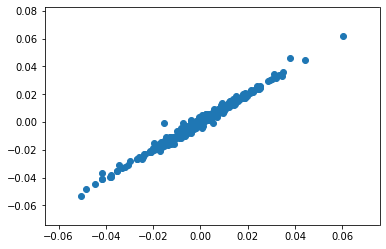

In [9]:
navDF['Date']=navDF.index

#XLK Change %   vs   NAV
plt.scatter(navDF['Close'],navDF['NAV'])

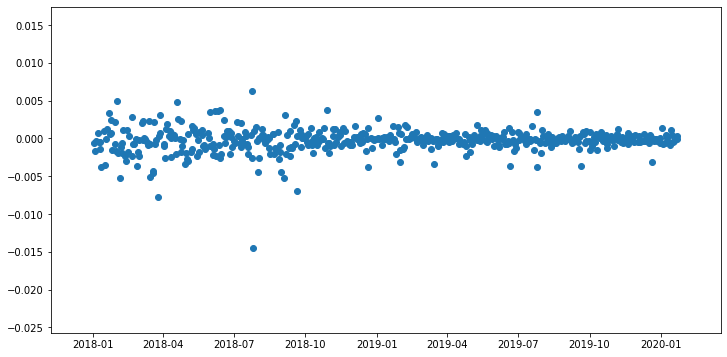

In [13]:
#change figure size for the plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=12
fig_size[1]=6
plt.rcParams["figure.figsize"]=fig_size

#(XLK Change % - NAV)   vs   Time or Date whatever
difDF=navDF['Close']-navDF['NAV']
plt.scatter(navDF['Date'],difDF)

(array([  6.87960537,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          6.87960537,   0.        ,   0.        ,   6.87960537,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  20.63881612,   0.        ,   6.87960537,
         20.63881612,   0.        ,  41.27763224,  20.63881612,
         20.63881612,  20.63881612,  34.39802687,  48.15723762,
         75.67565911, 103.19408061, 103.19408061, 116.95329136,
        199.50855584, 330.22105795, 481.57237618, 557.24803529,
        399.01711169, 288.94342571, 185.7493451 , 116.95329136,
         96.31447524,  48.15723762,  27.5184215 ,  41.27763224,
         27.5184215 ,  13.75921075,  13.

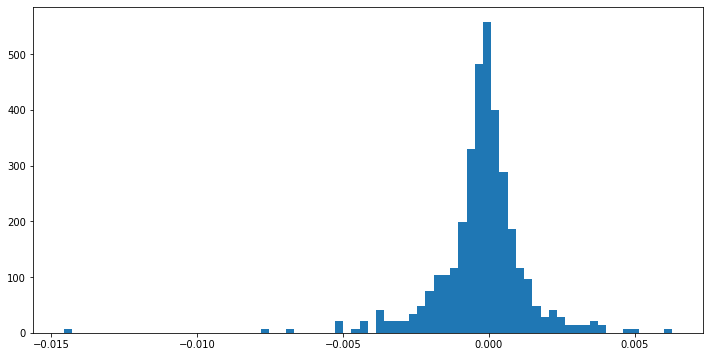

In [32]:
plt.hist(difDF,bins='auto',density=True,histtype='stepfilled')

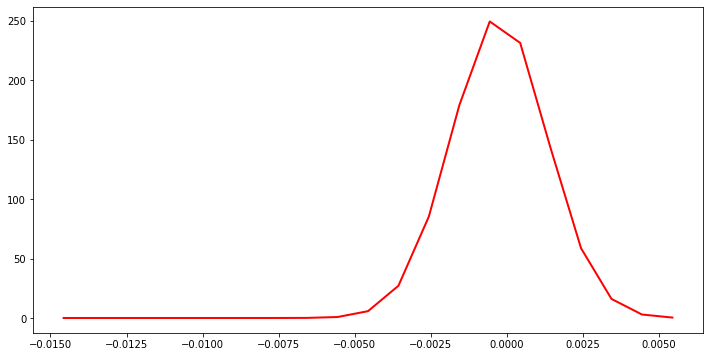

In [55]:
difDF.describe()
diffMean=difDF.describe()[1]
diffStDev=difDF.describe()[2]
rng=np.arange(difDF.describe()[3],difDF.describe()[7],0.001)
dist = norm(diffMean, diffStDev)
plt.subplot(111) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)

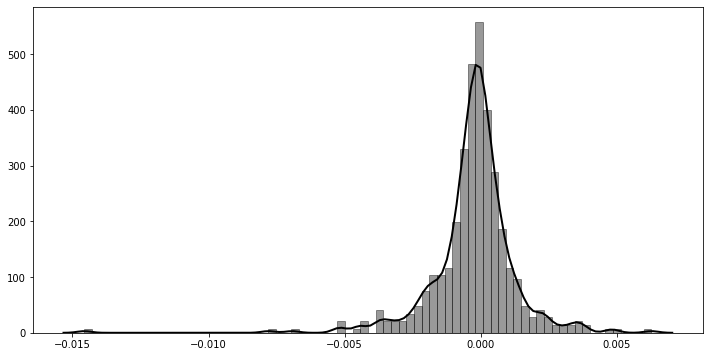

In [62]:
sns.distplot(difDF.values, hist=True, kde=True, 
             bins='auto', color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})